In [112]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # для работы со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [62]:
n=25
mean=15
confidence=0.98
l=mean/np.sqrt(n)*st.norm.ppf((1 + confidence) / 2)
L = l*2 #Запишите в эту переменную ваш посчитанный ответ!
print(round(L))

14


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьюдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [166]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

### Ваш код...
t, p_value = stats.ttest_ind(mens, womens) #Критерий Стьюдента (t-test)
t, p_value

(3.6635841716708892, 0.00024875321033580573)

т.к. p-value = 0.00024875321033580573< уровень значимости 𝛼 = 0.001 , также средние значения различаются на величину 3.66.

**Значит нулевая гипотеза не верна.**

Выборки различаются. На графике внизу видим незначительные отличия, а на ящике с усами нет видимых различий по средним значениям двух выборок**

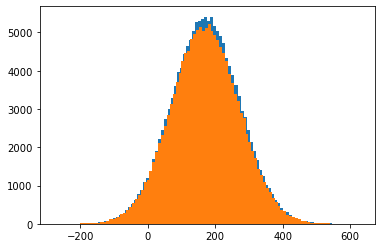

In [167]:
plt.hist(mens, bins=100); #Выборка mens
plt.hist(womens, bins=100);  #Выборка womens

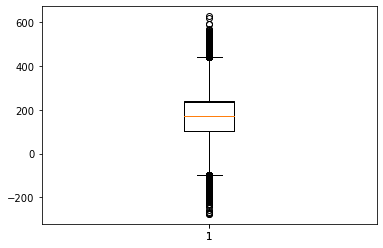

In [75]:
plt.boxplot(mens);
plt.boxplot(womens);

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [97]:
l=50
mean=150
confidence=0.95
n=(mean*st.norm.ppf((1 + confidence) / 2)/l)**2
print(round(n))

35


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [105]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [110]:
import scipy.stats as stats
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations)#Возможно пригодится эта функция.

oddsratio, pvalue


(0.5811965811965812, 0.35417955365927367)

**p-value (0.3541)> 𝛼=0.05, значит нулевая гипотеза принимается. Все предсказания волшебника случайны**

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [124]:
#Вспомогательная функция для подсчета доверительного интервала
# https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
def mean_confidence_interval(data, confidence=0.90): 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 
mean_confidence_interval(data, confidence=0.9)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [150]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]



### Критерий Стьюдента (t-test)

In [151]:
t, p_value = stats.ttest_ind(A, B) #Критерий Стьюдента (t-test)
t, p_value

(11.865233896372924, 4.623319592204015e-25)

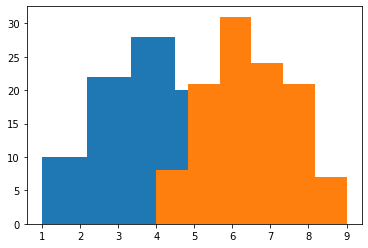

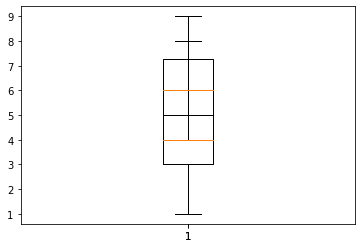

In [155]:
plt.hist(B, bins=6); #Выборка B
plt.hist(A, bins=6);  #Выборка A
plt.show()
plt.boxplot(A);
plt.boxplot(B);

Принимаем нулевую гипотезу, что данные не взаимосвязаны между собой.Уровень значимости принимаем как 0.05(5%).

p-value(4.62)>уровня значимости 0.05. 
Средние значения отличаются на величину 11.86

Оснований отвергать нулевую гипотезу нет.

На ящике с усами видим разные уровни среднего, разные максимальные значения.

**Выборки не связаны между собой.**

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

### Ваши выводы:
Если принять уровень значимости как 0.05, то
p-value = 0.03 < 0.05

Данные зависимы, нулевая гипотеза отвергается, принимаем альтернативную гипотезу, что распределение ненормальное.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [157]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test

In [158]:
 stats.ttest_rel(A,B)

Ttest_relResult(statistic=-2.0349336314319992, pvalue=0.042739435733033855)

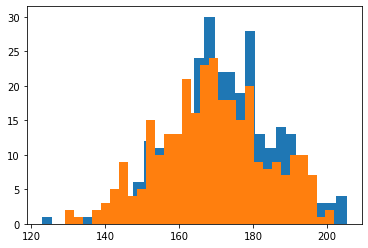

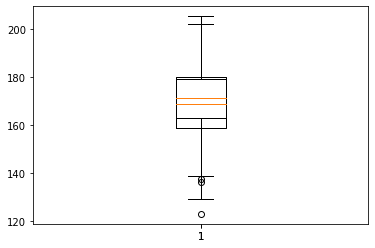

In [163]:
plt.hist(B, bins=30); #Выборка B
plt.hist(A, bins=30);  #Выборка A
plt.show()
plt.boxplot(A);
plt.boxplot(B);

Принимаем нулевую гипотезу- выборки независимы друг от друга.
p-value (0.0427) < уровня значимости 0.05

Значит нулевую гипотезу отвергаем.
**Зависимость есть**

При каком минимальном p-value различия были бы уже значимы?
**при p-value= 0,051**
